
In this dataset we will analyze the flight fare for Indian airways companies in 2019 between the months of march and june.



In [235]:
# Calling pandas and numpy
import pandas as pd
import numpy as np


# Calling visualizations libraries
import matplotlib.pyplot as plt
import seaborn as sns



from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
from sklearn import metrics
from sklearn.model_selection import cross_val_score
from xgboost import XGBRegressor as xgbr
from sklearn.metrics import r2_score
from sklearn.preprocessing import LabelEncoder

from sklearn.model_selection import cross_val_score, KFold



Loading our dataset

Repository: https://github.com/bobby6007/flight_fare_prediction

In [236]:
train_data = pd.read_csv('https://raw.githubusercontent.com/bobby6007/flight_fare_prediction/main/train_data.csv',index_col='id')
test_data = pd.read_csv('https://raw.githubusercontent.com/bobby6007/flight_fare_prediction/main/test_data.csv', index_col='id')


In [237]:
train_data.head()

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
id,,,,,,,,,,,
1,Vistara,UK-810,Bangalore,Early_Morning,one,Night,Mumbai,Economy,14.25,21,7212
2,SpiceJet,SG-5094,Hyderabad,Evening,zero,Night,Kolkata,Economy,1.75,7,5292
3,Vistara,UK-846,Bangalore,Morning,one,Evening,Delhi,Business,9.58,5,60553
4,Vistara,UK-706,Kolkata,Morning,one,Evening,Hyderabad,Economy,6.75,28,5760
5,Indigo,6E-5394,Chennai,Early_Morning,zero,Morning,Mumbai,Economy,2.00,4,10712


In [238]:
test_data.head()

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left
id,,,,,,,,,,
1,Air_India,AI-765,Kolkata,Evening,one,Night,Delhi,Business,28.25,2
2,Vistara,UK-747,Delhi,Early_Morning,one,Night,Mumbai,Business,13.83,34
3,Air_India,AI-570,Mumbai,Early_Morning,zero,Early_Morning,Chennai,Business,2.00,30
4,AirAsia,I5-974,Hyderabad,Night,one,Late_Night,Delhi,Economy,5.17,26
5,Air_India,AI-770,Kolkata,Night,one,Afternoon,Mumbai,Economy,16.33,35


# Data analysis: EDA

In this part:
1. Explore variables
2. Analyzing numerical and categorical variables
3. Looking for relationship between features

In [239]:
train_data.shape

(20000, 11)

In [240]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20000 entries, 1 to 20000
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   airline           20000 non-null  object 
 1   flight            20000 non-null  object 
 2   source_city       20000 non-null  object 
 3   departure_time    20000 non-null  object 
 4   stops             20000 non-null  object 
 5   arrival_time      20000 non-null  object 
 6   destination_city  20000 non-null  object 
 7   class             20000 non-null  object 
 8   duration          20000 non-null  float64
 9   days_left         20000 non-null  int64  
 10  price             20000 non-null  int64  
dtypes: float64(1), int64(2), object(8)
memory usage: 1.8+ MB


In [241]:
train_data.describe()

,duration,days_left,price
count,20000.000000,20000.000000,20000.000000
mean,12.177627,25.924150,20960.281700
std,7.157944,13.624874,22775.459535
min,0.830000,1.000000,1105.000000
25%,6.830000,14.000000,4783.000000
50%,11.250000,26.000000,7425.000000
75%,16.080000,38.000000,42521.000000
max,38.580000,49.000000,114523.000000


In [242]:
airline_names = train_data.airline.value_counts().index
airline_val = train_data.airline.value_counts().values


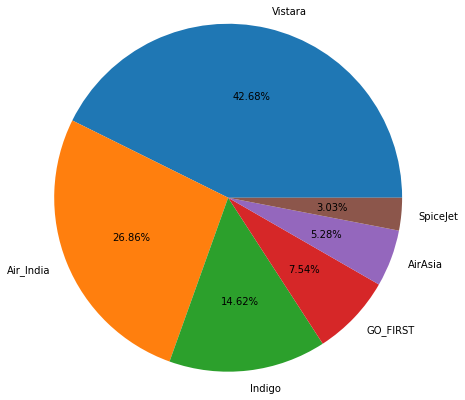

In [243]:
plt.pie(airline_val,labels=airline_names,autopct='%1.2f%%',radius=2)
plt.show()

In [244]:
class_names = train_data['class'].value_counts().index
class_val = train_data['class'].value_counts().values


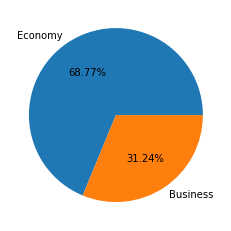

In [245]:
plt.pie(class_val,labels=class_names,autopct='%1.2f%%')
plt.show()

In [246]:
stops_names = train_data['stops'].value_counts().index
stops_val = train_data['stops'].value_counts().values


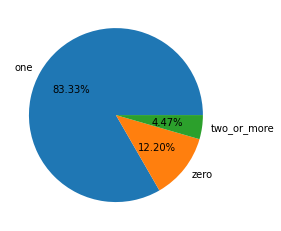

In [247]:
plt.pie(stops_val,labels=stops_names,autopct='%1.2f%%')
plt.show()

In [248]:
train_data['class'].value_counts()

Economy     13753
Business     6247
Name: class, dtype: int64

In [249]:
train_data['source_city'].value_counts()

Mumbai       4068
Delhi        4022
Bangalore    3486
Kolkata      3092
Hyderabad    2748
Chennai      2584
Name: source_city, dtype: int64

In [250]:
train_data['destination_city'].value_counts()

Mumbai       3918
Delhi        3825
Bangalore    3425
Kolkata      3323
Hyderabad    2814
Chennai      2695
Name: destination_city, dtype: int64

In [251]:
train_data['Trip']=train_data['source_city']+"_"+train_data['destination_city']

In [252]:
train_data['Trip'].unique()

array(['Bangalore_Mumbai', 'Hyderabad_Kolkata', 'Bangalore_Delhi',
       'Kolkata_Hyderabad', 'Chennai_Mumbai', 'Delhi_Chennai',
       'Bangalore_Hyderabad', 'Bangalore_Kolkata', 'Kolkata_Delhi',
       'Hyderabad_Delhi', 'Mumbai_Delhi', 'Mumbai_Kolkata',
       'Mumbai_Bangalore', 'Delhi_Mumbai', 'Mumbai_Hyderabad',
       'Delhi_Bangalore', 'Kolkata_Bangalore', 'Delhi_Hyderabad',
       'Chennai_Bangalore', 'Kolkata_Mumbai', 'Hyderabad_Chennai',
       'Kolkata_Chennai', 'Hyderabad_Mumbai', 'Mumbai_Chennai',
       'Hyderabad_Bangalore', 'Chennai_Kolkata', 'Bangalore_Chennai',
       'Delhi_Kolkata', 'Chennai_Delhi', 'Chennai_Hyderabad'],
      dtype=object)

In [253]:
train_data['Trip'].value_counts()

Mumbai_Delhi           1002
Delhi_Mumbai            981
Mumbai_Bangalore        920
Bangalore_Mumbai        909
Delhi_Bangalore         885
Bangalore_Delhi         884
Mumbai_Kolkata          824
Delhi_Kolkata           808
Kolkata_Mumbai          774
Delhi_Chennai           730
Kolkata_Delhi           711
Mumbai_Hyderabad        704
Bangalore_Kolkata       669
Kolkata_Bangalore       663
Hyderabad_Mumbai        659
Chennai_Delhi           652
Mumbai_Chennai          618
Delhi_Hyderabad         618
Chennai_Mumbai          595
Hyderabad_Delhi         576
Bangalore_Hyderabad     568
Hyderabad_Bangalore     539
Hyderabad_Kolkata       535
Kolkata_Hyderabad       492
Chennai_Kolkata         487
Bangalore_Chennai       456
Kolkata_Chennai         452
Hyderabad_Chennai       439
Chennai_Hyderabad       432
Chennai_Bangalore       418
Name: Trip, dtype: int64

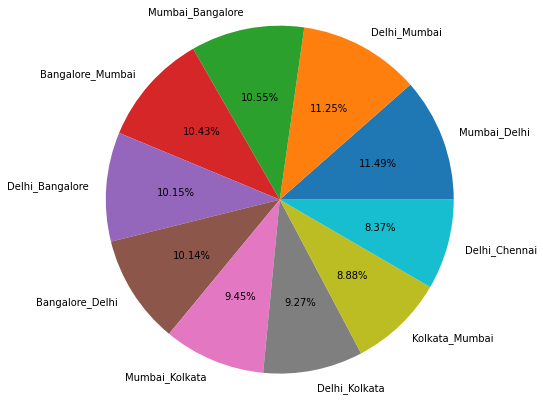

In [254]:
# Top ten trips

trips_names = train_data['Trip'].value_counts().index
trips_val = train_data['Trip'].value_counts().values
plt.pie(trips_val[:10],labels=trips_names[:10],autopct='%1.2f%%',radius=2)
plt.show()

In [255]:
train_data['Trip']= train_data['Trip'].replace('Delhi_Mumbai','Mumbai_Delhi')
train_data['Trip']= train_data['Trip'].replace('Delhi_Bangalore','Bangalore_Delhi')
train_data['Trip']= train_data['Trip'].replace('Bangalore_Mumbai','Mumbai_Bangalore')
train_data['Trip']= train_data['Trip'].replace('Mumbai_Kolkata','Kolkata_Mumbai')
train_data['Trip']= train_data['Trip'].replace('Delhi_Kolkata','Kolkata_Delhi')
train_data['Trip']= train_data['Trip'].replace('Delhi_Chennai','Chennai_Delhi')
train_data['Trip']= train_data['Trip'].replace('Mumbai_Hyderabad','Hyderabad_Mumbai')
train_data['Trip']= train_data['Trip'].replace('Mumbai_Chennai','Chennai_Mumbai')
train_data['Trip']= train_data['Trip'].replace('Bangalore_Kolkata','Kolkata_Bangalore')
train_data['Trip']= train_data['Trip'].replace('Delhi_Hyderabad','Hyderabad_Delhi')
train_data['Trip']= train_data['Trip'].replace('Bangalore_Hyderabad','Hyderabad_Bangalore')
train_data['Trip']= train_data['Trip'].replace('Hyderabad_Kolkata','Kolkata_Hyderabad')
train_data['Trip']= train_data['Trip'].replace('Chennai_Kolkata','Kolkata_Chennai')
train_data['Trip']= train_data['Trip'].replace('Chennai_Bangalore','Bangalore_Chennai')
train_data['Trip']= train_data['Trip'].replace('Hyderabad_Chennai','Chennai_Hyderabad') 

In [256]:
train_data['arrival_time'].value_counts()

Night            6142
Evening          5316
Morning          4086
Afternoon        2536
Early_Morning    1004
Late_Night        916
Name: arrival_time, dtype: int64

In [257]:
train_data['departure_time'].value_counts()

Morning          4738
Early_Morning    4432
Evening          4341
Night            3231
Afternoon        3166
Late_Night         92
Name: departure_time, dtype: int64

In [258]:
train_data['Time']=train_data['departure_time']+"_"+train_data['arrival_time']
train_data.head(1)

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price,Trip,Time
id,,,,,,,,,,,,,
1,Vistara,UK-810,Bangalore,Early_Morning,one,Night,Mumbai,Economy,14.25,21,7212,Mumbai_Bangalore,Early_Morning_Night


In [259]:
train_data['airline_class']=train_data['airline']+"_"+train_data['class']
train_data.head(1)

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price,Trip,Time,airline_class
id,,,,,,,,,,,,,,
1,Vistara,UK-810,Bangalore,Early_Morning,one,Night,Mumbai,Economy,14.25,21,7212,Mumbai_Bangalore,Early_Morning_Night,Vistara_Economy


In [260]:
train_data['stops'].value_counts()

one            16666
zero            2440
two_or_more      894
Name: stops, dtype: int64

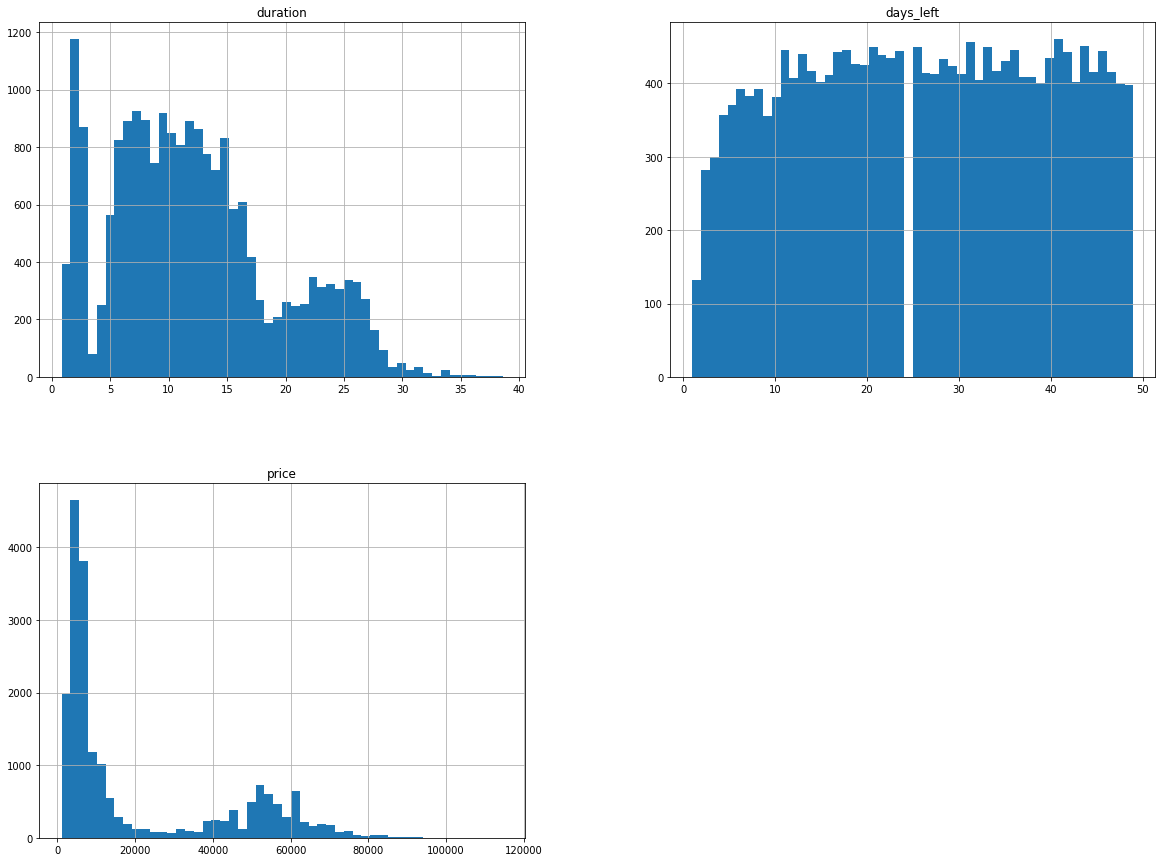

In [261]:
%matplotlib inline
train_data.hist(bins=50, figsize=(20,15))
plt.show()

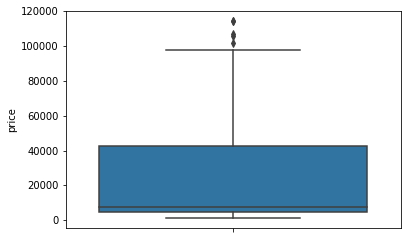

In [262]:
ax=sns.boxplot(y='price',data=train_data)

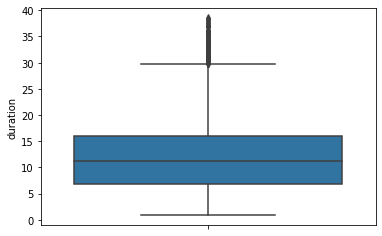

In [263]:
ax=sns.boxplot(y='duration',data=train_data)

In [264]:
# train_data.drop(train_data[(train_data['price'] >70000)].index, inplace=True)

# train_data.drop(train_data[(train_data['duration'] >35)].index, inplace=True)


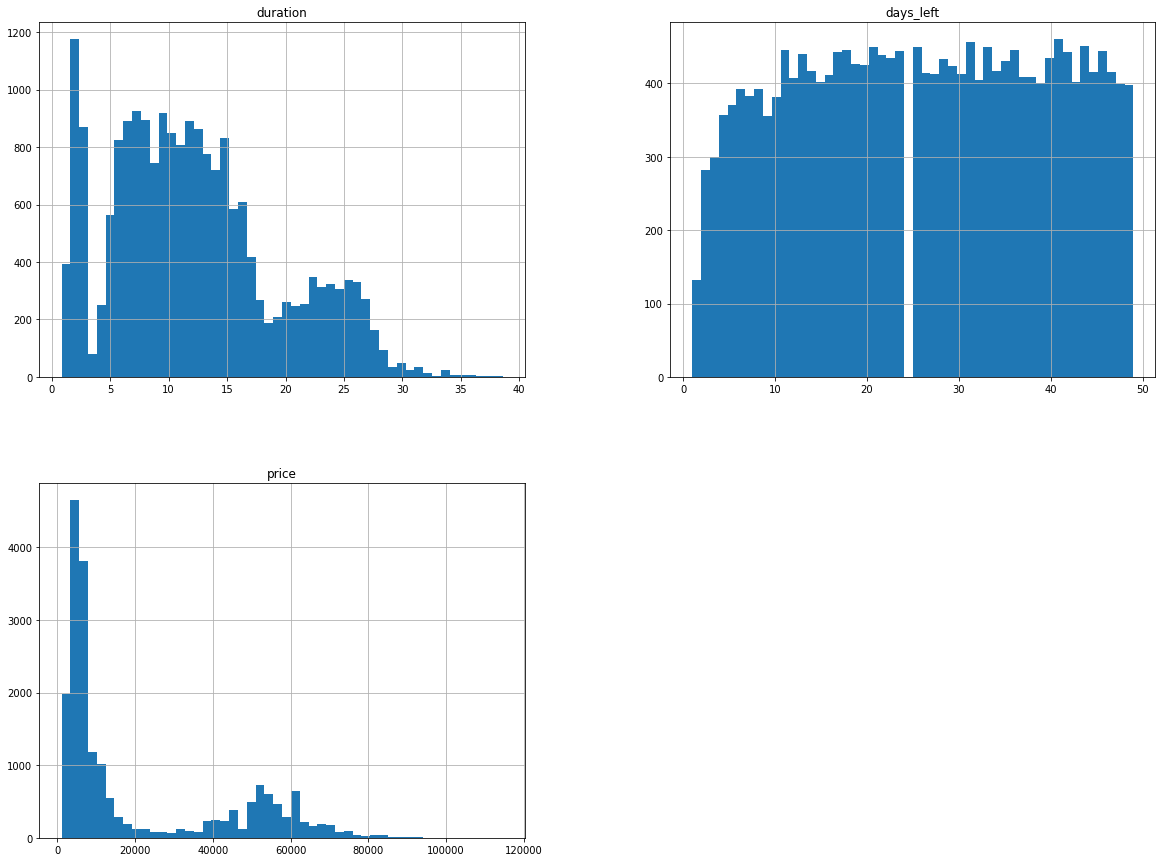

In [265]:
%matplotlib inline
train_data.hist(bins=50, figsize=(20,15))
plt.show()

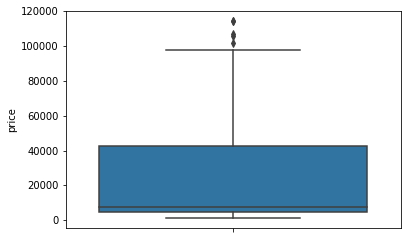

In [266]:
ax=sns.boxplot(y='price',data=train_data)

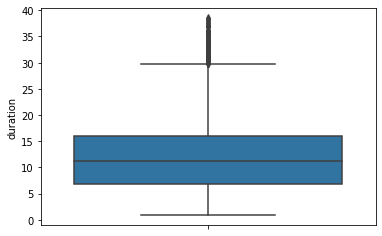

In [267]:
ax=sns.boxplot(y='duration',data=train_data)

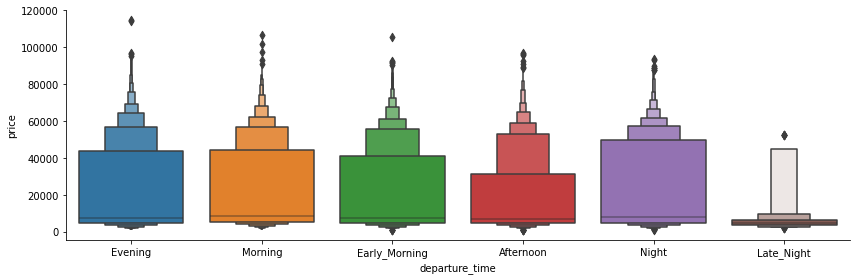

In [268]:
sns.catplot(y = "price", x = "departure_time", data = train_data.sort_values("price", ascending = False), kind="boxen", height = 4, aspect = 3)
plt.show()


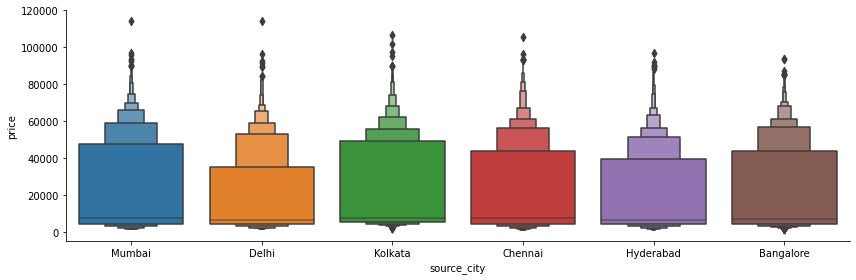

In [269]:
sns.catplot(y = "price", x = "source_city", data = train_data.sort_values("price", ascending = False), kind="boxen", height = 4, aspect = 3)
plt.show()


In [270]:
train_data['flight'].value_counts()

UK-706     208
UK-720     190
UK-822     178
UK-836     169
UK-772     169
          ... 
6E-2471      1
6E-821       1
SG-1031      1
6E-759       1
6E-7201      1
Name: flight, Length: 1310, dtype: int64

In [271]:
train_data['airline'].value_counts()

Vistara      8535
Air_India    5371
Indigo       2924
GO_FIRST     1508
AirAsia      1056
SpiceJet      606
Name: airline, dtype: int64

In [272]:
train_data['airline'].value_counts()

Vistara      8535
Air_India    5371
Indigo       2924
GO_FIRST     1508
AirAsia      1056
SpiceJet      606
Name: airline, dtype: int64

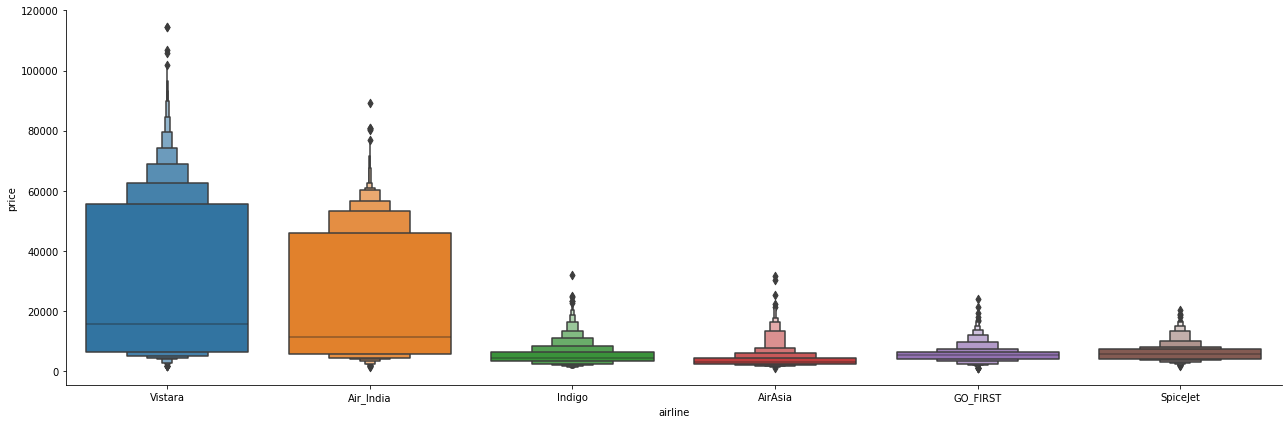

In [273]:
sns.catplot(y = "price", x = "airline", data = train_data.sort_values("price", ascending = False), kind="boxen", height = 6, aspect = 3)
plt.show()

In [274]:
# As it can be observed prices differ based on airline therefore we can transfer labels into numerical values based on rankings

train_data['airline']=train_data['airline'].map({'SpiceJet':1,'GO_FIRST':2,'AirAsia':3,'Indigo':4,'Air_India':5,'Vistara':6})


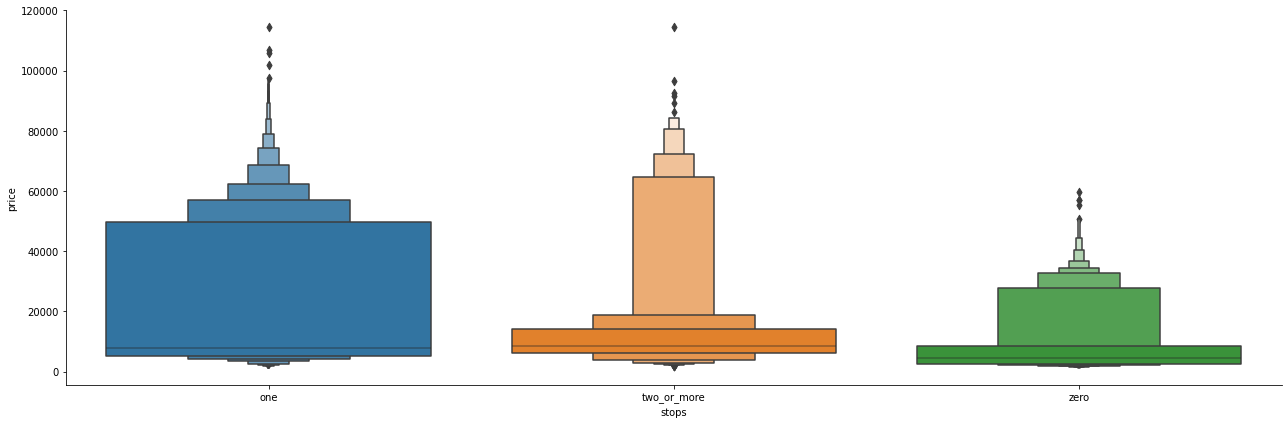

In [275]:
sns.catplot(y = "price", x = "stops", data = train_data.sort_values("price", ascending = False), kind="boxen", height = 6, aspect = 3)
plt.show()

In [276]:
labelencoder = LabelEncoder()
train_data['class'] = labelencoder.fit_transform(train_data['class'].values)
train_data['destination_city'] = labelencoder.fit_transform(train_data['destination_city'].values)
train_data['arrival_time'] = labelencoder.fit_transform(train_data['arrival_time'].values)
train_data['stops'] = labelencoder.fit_transform(train_data['stops'].values)
train_data['departure_time'] = labelencoder.fit_transform(train_data['departure_time'].values)
train_data['source_city'] = labelencoder.fit_transform(train_data['source_city'].values)
#train_data['airline'] = labelencoder.fit_transform(train_data['airline'].values)
train_data['Trip'] = labelencoder.fit_transform(train_data['Trip'].values)
train_data['Time'] = labelencoder.fit_transform(train_data['Time'].values)
train_data['airline_class'] = labelencoder.fit_transform(train_data['airline_class'].values)

# train_data['stops']=train_data['stops'].map({'zero':1,'one':2,'two_or_more':3})



In [277]:
# airline = train_data[['airline']]
# destination_city = train_data[['destination_city']]
# arrival_time = train_data[['arrival_time']]
# stops = train_data[['stops']]
# departure_time = train_data[['departure_time']]
# source_city = train_data[['source_city']]
# class_type = train_data[['class']]



In [278]:
# from sklearn.preprocessing import OneHotEncoder
# cat_encoder = OneHotEncoder()
# airline_encoded= cat_encoder.fit_transform(airline)
# destination_city_encoded= cat_encoder.fit_transform(destination_city)
# arrival_time_encoded= cat_encoder.fit_transform(arrival_time)
# stops_encoded= cat_encoder.fit_transform(stops)
# departure_time_encoded= cat_encoder.fit_transform(departure_time)
# source_city_encoded= cat_encoder.fit_transform(source_city)
# class_type_encoded= cat_encoder.fit_transform(class_type)



In [279]:
# source_city= train_data[["source_city"]]

# source_city= pd.get_dummies(source_city, drop_first= False)

# source_city.head()

In [280]:
# trip= train_data[["Trip"]]

# trip= pd.get_dummies(trip, drop_first= False)

# trip.head()

In [281]:
# destination_city= train_data[["destination_city"]]

# destination_city= pd.get_dummies(destination_city, drop_first= False)

# destination_city.head()

In [282]:
# arrival_time= train_data[["arrival_time"]]

# arrival_time= pd.get_dummies(arrival_time, drop_first= False)

# arrival_time.head()

In [283]:
# # stops= train_data[["stops"]]

# # stops= pd.get_dummies(stops, drop_first= False)

# # stops.head()

# train_data['stops']=train_data['stops'].map({'zero':1,'one':2,'two_or_more':3})



In [284]:
# departure_time= train_data[["departure_time"]]

# departure_time= pd.get_dummies(departure_time, drop_first= False)

# departure_time.head()

In [285]:
# # class_type= train_data[["class"]]

# # class_type= pd.get_dummies(class_type, drop_first= False)

# # class_type.head()

# train_data['class']=train_data['class'].map({'Economy':0,'Business':1})

In [286]:
# # Concatenate dataframe 

# data_train = pd.concat([train_data, arrival_time,departure_time,trip], axis = 1)




In [287]:
train_data.head(1)

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price,Trip,Time,airline_class
id,,,,,,,,,,,,,,
1,6,UK-810,0,1,0,5,5,1,14.25,21,7212,13,11,7


In [288]:
data_train=train_data

In [289]:
data_train.shape

(20000, 14)

In [290]:
data_train.isnull().sum()

airline             0
flight              0
source_city         0
departure_time      0
stops               0
arrival_time        0
destination_city    0
class               0
duration            0
days_left           0
price               0
Trip                0
Time                0
airline_class       0
dtype: int64

In [291]:
#data_train.drop(["flight",'Trip', "destination_city", "arrival_time","departure_time","source_city"], axis = 1, inplace = True)

# data_train.drop(['source_city','destination_city','arrival_time','departure_time','Trip','Time'], axis=1, inplace=True)


In [292]:
data_train.head()

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price,Trip,Time,airline_class
id,,,,,,,,,,,,,,
1,6,UK-810,0,1,0,5,5,1,14.25,21,7212,13,11,7
2,1,SG-5094,3,2,2,5,4,1,1.75,7,5292,11,17,5
3,6,UK-846,0,4,0,2,2,0,9.58,5,60553,1,26,6
4,6,UK-706,4,4,0,2,3,1,6.75,28,5760,11,26,7
5,4,6E-5394,1,1,2,4,5,1,2.00,4,10712,4,10,4


In [293]:
data_train.corrwith(data_train['price']).abs().sort_values(ascending=False)

price               1.000000
class               0.937868
airline             0.424242
duration            0.213158
stops               0.201309
days_left           0.102545
airline_class       0.096603
Time                0.065800
departure_time      0.058520
arrival_time        0.046801
Trip                0.028328
source_city         0.013570
destination_city    0.008747
dtype: float64

In [294]:
corr_matrix = data_train.corr().abs()
corr_matrix.style.background_gradient(cmap='coolwarm')

,airline,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price,Trip,Time,airline_class
airline,1.000000,0.013481,0.091404,0.136875,0.052658,0.027706,0.398738,0.251252,0.027813,0.424242,0.040812,0.099416,0.509400
source_city,0.013481,1.000000,0.006443,0.002982,0.037453,0.231524,0.007379,0.006542,0.003307,0.013570,0.455516,0.000245,0.017525
departure_time,0.091404,0.006443,1.000000,0.019553,0.040011,0.011299,0.057410,0.091432,0.006627,0.058520,0.009892,0.986435,0.046839
stops,0.136875,0.002982,0.019553,1.000000,0.007015,0.015075,0.096970,0.480818,0.023782,0.201309,0.015417,0.018264,0.030064
arrival_time,0.052658,0.037453,0.040011,0.007015,1.000000,0.031399,0.035101,0.011622,0.010408,0.046801,0.004624,0.124553,0.035276
destination_city,0.027706,0.231524,0.011299,0.015075,0.031399,1.000000,0.002545,0.012434,0.011963,0.008747,0.458836,0.006062,0.035157
class,0.398738,0.007379,0.057410,0.096970,0.035101,0.002545,1.000000,0.144831,0.022332,0.937868,0.014704,0.062775,0.017397
duration,0.251252,0.006542,0.091432,0.480818,0.011622,0.012434,0.144831,1.000000,0.020091,0.213158,0.004910,0.092703,0.001395
days_left,0.027813,0.003307,0.006627,0.023782,0.010408,0.011963,0.022332,0.020091,1.000000,0.102545,0.003198,0.004871,0.022588
price,0.424242,0.013570,0.058520,0.201309,0.046801,0.008747,0.937868,0.213158,0.102545,1.000000,0.028328,0.065800,0.096603


In [295]:
data_train.head()

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price,Trip,Time,airline_class
id,,,,,,,,,,,,,,
1,6,UK-810,0,1,0,5,5,1,14.25,21,7212,13,11,7
2,1,SG-5094,3,2,2,5,4,1,1.75,7,5292,11,17,5
3,6,UK-846,0,4,0,2,2,0,9.58,5,60553,1,26,6
4,6,UK-706,4,4,0,2,3,1,6.75,28,5760,11,26,7
5,4,6E-5394,1,1,2,4,5,1,2.00,4,10712,4,10,4


In [296]:
data_train.isnull().sum()

airline             0
flight              0
source_city         0
departure_time      0
stops               0
arrival_time        0
destination_city    0
class               0
duration            0
days_left           0
price               0
Trip                0
Time                0
airline_class       0
dtype: int64

In [297]:
X = data_train.drop(['flight','price'], axis=1)


y = data_train["price"].copy()




In [298]:
X.columns

Index(['airline', 'source_city', 'departure_time', 'stops', 'arrival_time',
       'destination_city', 'class', 'duration', 'days_left', 'Trip', 'Time',
       'airline_class'],
      dtype='object')

In [299]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20000 entries, 1 to 20000
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   airline           20000 non-null  int64  
 1   source_city       20000 non-null  int64  
 2   departure_time    20000 non-null  int64  
 3   stops             20000 non-null  int64  
 4   arrival_time      20000 non-null  int64  
 5   destination_city  20000 non-null  int64  
 6   class             20000 non-null  int64  
 7   duration          20000 non-null  float64
 8   days_left         20000 non-null  int64  
 9   Trip              20000 non-null  int64  
 10  Time              20000 non-null  int64  
 11  airline_class     20000 non-null  int64  
dtypes: float64(1), int64(11)
memory usage: 2.0 MB


In [300]:
from sklearn.covariance import EllipticEnvelope
# identify outliers in the training dataset
ee = EllipticEnvelope(contamination=0.01)
yhat = ee.fit_predict(X)

/usr/local/lib/python3.7/dist-packages/sklearn/covariance/_robust_covariance.py:739: UserWarning: The covariance matrix associated to your dataset is not full rank
  "The covariance matrix associated to your dataset is not full rank"
/usr/local/lib/python3.7/dist-packages/sklearn/covariance/_robust_covariance.py:189: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-20.823731193105566 > -56.801581304525584). You may want to try with a higher value of support_fraction (current value: 0.502).
  RuntimeWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/covariance/_robust_covariance.py:189: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-22.619007984326419 > -22.884354750024738). You may want to try with a higher value of support_fraction (current value: 0.502).
  RuntimeWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/covariance/_robust_covariance.py:189: RuntimeWarning: Determina

In [301]:
# Normalizing test data
standart_scaler = StandardScaler()
standart_scaler.fit_transform(X)
X=standart_scaler.fit_transform(X)

Preprocessing test data

In [302]:
# Preprocessing test data

test_data['Trip']=test_data['source_city']+"_"+test_data['destination_city']

test_data['Trip']= test_data['Trip'].replace('Delhi_Mumbai','Mumbai_Delhi')
test_data['Trip']= test_data['Trip'].replace('Delhi_Bangalore','Bangalore_Delhi')
test_data['Trip']= test_data['Trip'].replace('Bangalore_Mumbai','Mumbai_Bangalore')
test_data['Trip']= test_data['Trip'].replace('Mumbai_Kolkata','Kolkata_Mumbai')
test_data['Trip']= test_data['Trip'].replace('Delhi_Kolkata','Kolkata_Delhi')
test_data['Trip']= test_data['Trip'].replace('Delhi_Chennai','Chennai_Delhi')
test_data['Trip']= test_data['Trip'].replace('Mumbai_Hyderabad','Hyderabad_Mumbai')
test_data['Trip']= test_data['Trip'].replace('Mumbai_Chennai','Chennai_Mumbai')
test_data['Trip']= test_data['Trip'].replace('Bangalore_Kolkata','Kolkata_Bangalore')
test_data['Trip']= test_data['Trip'].replace('Delhi_Hyderabad','Hyderabad_Delhi')
test_data['Trip']= test_data['Trip'].replace('Bangalore_Hyderabad','Hyderabad_Bangalore')
test_data['Trip']= test_data['Trip'].replace('Hyderabad_Kolkata','Kolkata_Hyderabad')
test_data['Trip']= test_data['Trip'].replace('Chennai_Kolkata','Kolkata_Chennai')
test_data['Trip']= test_data['Trip'].replace('Chennai_Bangalore','Bangalore_Chennai')
test_data['Trip']= test_data['Trip'].replace('Hyderabad_Chennai','Chennai_Hyderabad') 



test_data['airline_class']=test_data['class']+"_"+test_data['airline']

test_data['Time']=test_data['departure_time']+"_"+test_data['arrival_time']



#Filtering outliers

#test_data.drop(test_data[(test_data['duration'] >35)].index, inplace=True)

# Transforming categorical data 

# trip= test_data[["Trip"]]
# trip= pd.get_dummies(trip, drop_first= False)

# As it can be observed prices differ based on airline therefore we can transfer labels into numerical values based on rankings

test_data['airline']=test_data['airline'].map({'SpiceJet':1,'GO_FIRST':2,'AirAsia':3,'Indigo':4,'Air_India':5,'Vistara':6})

test_data['stops']=test_data['stops'].map({'zero':1,'one':2,'two_or_more':3})

# destination_city= test_data[["destination_city"]]
# destination_city= pd.get_dummies(destination_city, drop_first= False)

# arrival_time= test_data[["arrival_time"]]
# arrival_time= pd.get_dummies(arrival_time, drop_first= False)

# stops= test_data[["stops"]]
# stops= pd.get_dummies(stops, drop_first= False)

# departure_time= test_data[["departure_time"]]
# departure_time= pd.get_dummies(departure_time, drop_first= False)

# source_city= test_data[["source_city"]]
# source_city= pd.get_dummies(source_city, drop_first= False)

# class_type= test_data[["class"]]
# class_type= pd.get_dummies(class_type, drop_first= False)

labelencoder = LabelEncoder()
test_data['class'] = labelencoder.fit_transform(test_data['class'].values)
test_data['destination_city'] = labelencoder.fit_transform(test_data['destination_city'].values)
test_data['arrival_time'] = labelencoder.fit_transform(test_data['arrival_time'].values)
#test_data['stops'] = labelencoder.fit_transform(test_data['stops'].values)
test_data['departure_time'] = labelencoder.fit_transform(test_data['departure_time'].values)
test_data['source_city'] = labelencoder.fit_transform(test_data['source_city'].values)
#test_data['airline'] = labelencoder.fit_transform(test_data['airline'].values)
test_data['Trip'] = labelencoder.fit_transform(test_data['Trip'].values)
test_data['Time'] = labelencoder.fit_transform(test_data['Time'].values)
test_data['airline_class'] = labelencoder.fit_transform(test_data['airline_class'].values)





# Concatenate dataframe --> train_data + airline, destination_city, arrival_time,stops,departure_time,source_city,class_type

# data_test = pd.concat([test_data, arrival_time,departure_time,trip], axis =1)




# Dropping features
# data_test.drop(["flight",'Trip', "destination_city", "arrival_time","departure_time","source_city"], axis = 1, inplace = True)
test_data.drop(['flight'], axis=1, inplace=True)





# Normalizing test data
standart_scaler = StandardScaler()
standart_scaler.fit_transform(test_data)
data_test=standart_scaler.fit_transform(test_data)

In [303]:
test_data.head(1)

,airline,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,Trip,airline_class,Time
id,,,,,,,,,,,,
1,5,4,2,2,5,2,0,28.25,2,10,0,17


In [304]:
#data_test.isnull().sum()/len(data_test)*100

# ML

In [305]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state =45)

## Random Forest

In [306]:
reg_rf = RandomForestRegressor()
reg_rf.fit(X_train, y_train)

RandomForestRegressor()

In [307]:
y_pred = reg_rf.predict(X_test)


In [308]:
reg_rf.score(X_train, y_train)


0.9958685580742517

In [309]:
reg_rf.score(X_test, y_test)


0.9708030039985192

In [310]:
submissionrf = reg_rf.predict(test_data)


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but RandomForestRegressor was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


In [311]:
lin_mse = mean_squared_error(y_test, y_pred)
# RMSE hisoblaymiz
lin_rmse = np.sqrt(lin_mse)
print(lin_rmse)

3914.2855242599685


## Evaluation


In [312]:
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

MAE: 2068.1893028095237
MSE: 15321631.165431136
RMSE: 3914.2855242599685


XBGBooster

In [313]:
xgb_model = xgbr(objective = 'reg:squarederror',n_jobs=8, tree_method='exact', learning_rate = 0.1, max_depth = 9, n_estimators = 50)
xgb_model.fit(X_train, y_train)

XGBRegressor(max_depth=9, n_estimators=50, n_jobs=8,
             objective='reg:squarederror', tree_method='exact')

In [314]:
#Model details
print('---XGBoost Regressor---')
test_pred_xgb = xgb_model.predict(X_test) # predicting test data
train_pred_xgb = xgb_model.predict(X_train) # predicting train data

print("Model Score on train data", ((r2_score(y_train, train_pred_xgb)*100).round(3)),'%')
print("Model Score on test data", ((r2_score(y_test,test_pred_xgb)*100).round(3)),'%')
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, test_pred_xgb)))

---XGBoost Regressor---
Model Score on train data 98.079 %
Model Score on test data 96.748 %
RMSE: 4131.080994851345


In [315]:
kfold = KFold(n_splits=10, shuffle=True)
kf_cv_scores = cross_val_score(xgb_model, X_train, y_train, cv=kfold )
print("K-fold CV average score: %.2f" % kf_cv_scores.mean())

K-fold CV average score: 0.97


# LinearRegression

In [316]:

LR_model = LinearRegression()

In [317]:
LR_model.fit(X, y)


LinearRegression()

In [318]:
y_pred = LR_model.predict(X_test)
y_pred

array([54426.87357342, 52273.79637816, 11943.12871507, ...,
        6394.58011015,  6146.30741265,  5368.66803072])

In [319]:
lin_mse = mean_squared_error(y_test, y_pred)
# RMSE hisoblaymiz
lin_rmse = np.sqrt(lin_mse)
print(lin_rmse)

7048.750896760155


## Decision Tree

In [320]:
Tree_model = DecisionTreeRegressor()
Tree_model.fit(X, y)


DecisionTreeRegressor()

In [321]:
y_predicted = Tree_model.predict(X_test)


In [322]:
# submission = Tree_model.predict(data_test)


In [323]:
lin_mse = mean_squared_error(y_test, y_predicted)
# RMSE hisoblaymiz
lin_rmse = np.sqrt(lin_mse)
print(lin_rmse)

177.8609014089381


## Cross Validation

In [324]:
def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Std.dev:", scores.std())

In [325]:
scores = cross_val_score(LR_model, X, y, scoring="neg_mean_squared_error", cv=10)
LR_rmse_scores = np.sqrt(-scores)


In [326]:
display_scores(LR_rmse_scores)


Scores: [6965.95412114 7023.87808748 6920.9403493  6597.26466259 7070.06486693
 6935.89759355 7250.62764049 6811.72944541 6950.75509137 7277.60713679]
Mean: 6980.4718995055355
Std.dev: 187.91780161299639


## Saving the submission file

In [327]:
pred = pd.DataFrame(submissionrf)
sub_df = pd.read_csv('https://raw.githubusercontent.com/bobby6007/flight_fare_prediction/main/sample_solution.csv')
datasets = pd.concat([sub_df['id'],pred],axis=1)
datasets.columns=['id','price']
datasets.to_csv('final_submission.csv',index=False)

In [328]:
df = pd.read_csv('/content/final_submission.csv')
df

,id,price
0,1,13131.976667
1,2,13211.316667
2,3,8322.700000
3,4,13211.316667
4,5,13561.126667
...,...,...
4995,4996,13090.056667
4996,4997,14108.326667
4997,4998,13131.976667
4998,4999,13131.976667
